In [2]:
#HW1: Customer Lifetime Value
#Submitted by : Vaibhavi Udgirkar
#AndrewID: vudgirka

In [283]:
!pip install ydata_profiling

In [284]:
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
#Reading the CSV File
df = pd.read_csv("customer_sales.csv")

In [286]:
#Print the contents of csv
df

Order ID Order Date     Customer Name         Country  \
0     BN-2011-7407039     1/1/11        Ruby Patel          Sweden   
1     AZ-2011-9050313     1/3/11    Summer Hayward  United Kingdom   
2     AZ-2011-6674300     1/4/11  Devin Huddleston          France   
3     BN-2011-2819714     1/4/11       Mary Parker  United Kingdom   
4     BN-2011-2819714     1/4/11       Mary Parker  United Kingdom   
...               ...        ...               ...             ...   
8042   AZ-2014-766953   12/31/14      Jose Gambino  United Kingdom   
8043  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8044  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8045  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8046   AZ-2014-766953   12/31/14      Jose Gambino  United Kingdom   

                     State        City   Region      Segment     Ship Mode  \
0                Stockholm   Stockholm    North  Home Office  Economy Plus   
1                  England   Southport    North     Consumer       Economy   
2     Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                  England  Birmingham    North    Corporate       Economy   
4                  England  Birmingham    North    Corporate       Economy   
...                    ...         ...      ...          ...           ...   
8042               England  Maidenhead    North    Corporate       Economy   
8043         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8044         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8045         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8046               England  Maidenhead    North    Corporate       Economy   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8042        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8043  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8044  Office Supplies      Binders          Avery Binder Covers, Recycled   
8045       Technology     Machines                    StarTech Phone, Red   
8046       Technology       Phones              Motorola Audio Dock, VoIP   

      Discount Sales  Profit  Quantity  
0          0.5   $45   -26.0       3.0  
1          0.0  $854   290.0       7.0  
2          0.0  $140    21.0       3.0  
3          0.5   $27   -22.0       2.0  
4          0.5   $17    -1.0       2.0  
...        ...   ...     ...       ...  
8042       0.0  $245    91.0       2.0  
8043       0.5   $30   -10.0       2.0  
8044       0.5   $23    -6.0       4.0  
8045       0.5  $108   -19.0       3.0  
8046       0.0  $867   251.0       5.0  

[8047 rows x 16 columns]

# ***Step 1: Understand the dataset***

In [287]:


#Finding the missing values in the data set using the ProfileReport function
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [288]:
# Q1. Display missing values
missing_values = pd.DataFrame({
    "Category": df.columns,
    "Number of Missing Values": df.isna().sum().values
})
missing_values

Category  Number of Missing Values
0        Order ID                         0
1      Order Date                         6
2   Customer Name                         1
3         Country                         1
4           State                         4
5            City                         4
6          Region                         0
7         Segment                         1
8       Ship Mode                         5
9        Category                         5
10   Sub-Category                         0
11   Product Name                         0
12       Discount                         7
13          Sales                         2
14         Profit                        13
15       Quantity                        13

In [289]:
# Q2. Range of dates in dataset
df['Order Date'] = pd.to_datetime(df['Order Date'])

min_date = df['Order Date'].min()
max_date = df['Order Date'].max()

print(f"The range of order dates is from {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}.")

The range of order dates is from 2011-01-01 to 2014-12-31.


<ipython-input-289-f3cbc292cedf>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [290]:
# Q3. Number of unique customers in the dataset
unique_customers_count = df['Customer Name'].nunique()
unique_customers_count


792

In [291]:
# Q4. Number of unique orders in the dataset
unique_order_count = df['Order ID'].nunique()
unique_order_count

4117

In [303]:
# Q5. Standard descriptive statistics for the Sales field
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
summary = df.describe()
summary


Order Date     Discount          Sales       Profit  \
count                           8041  8040.000000    8045.000000  8034.000000   
mean   2013-04-19 23:52:50.202711040     0.112090     342.542946    34.976226   
min              2011-01-01 00:00:00     0.000000    -110.000000 -3060.000000   
25%              2012-06-09 00:00:00     0.000000      48.000000     1.000000   
50%              2013-06-12 00:00:00     0.000000     116.000000    14.000000   
75%              2014-05-01 00:00:00     0.100000     313.000000    47.000000   
max              2014-12-31 00:00:00     0.900000  206000.000000  2476.000000   
std                              NaN     0.183016    3218.073605   177.451172   

          Quantity  
count  8034.000000  
mean      3.769978  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%       5.000000  
max      14.000000  
std       2.201674

In [304]:
# Q5 Calculating the Variance of Sales Field
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)

sales_variance = df['Sales'].var()
{
   "Sales Variance" : sales_variance
}


{'Sales Variance': 10355997.724068955}

In [305]:
# Q6.
#Organizing all sales by year and calculating the sum of sales for each year
df_result = df.groupby(df['Order Date'].dt.year.dropna())['Sales'].sum().reset_index()
df_result['Order Date'] = df_result['Order Date'].astype(int)
df_result

Order Date     Sales
0        2011  615533.0
1        2012  548880.0
2        2013  836018.0
3        2014  754796.0

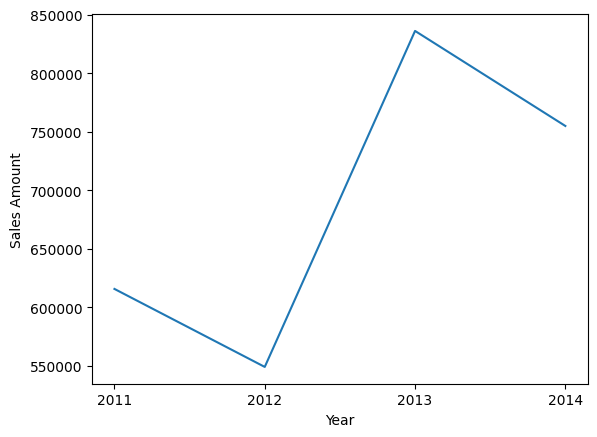

In [307]:
# Plotting the graph
plt.plot(df_result['Order Date'], df_result['Sales'])

plt.xticks(df_result['Order Date'])
plt.xlabel("Year")
plt.ylabel("Sales Amount")

plt.show()

Q6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)?

There is no apparent upward trend in sales over time, according to the data. 2012 had a decline in sales, but 2013 saw a peak, and 2014 saw a little decline. This pattern raises the possibility that variables other than inflation, such consumer behavior or market conditions, may have affected the sales figures.

# ***Step 2: Explore the data***

Text(0, 0.5, 'Date')

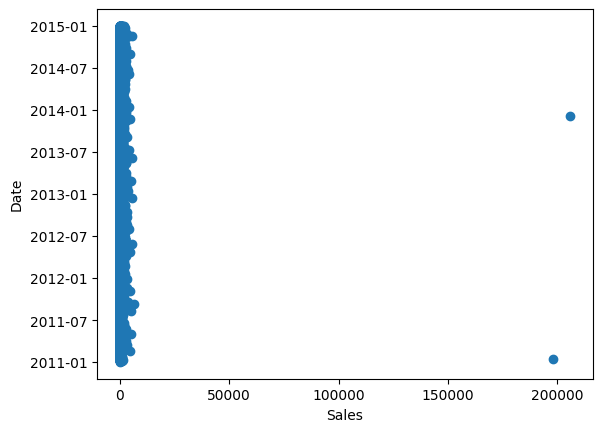

In [204]:
#Q1. Checking for outliers
# To check for any outliers, we plot a a scatter plot for Sales to observe if there is any value abnormally large or small.
plt.scatter(df['Sales'], df['Order Date'])

#Adding titles for axes
plt.xlabel('Sales')
plt.ylabel('Date')

In [240]:
# Q1. Treating the outliers
# Identifying the outliers
df.sort_values(by='Sales')

#Now we know, there are sales values that are negative (possible returns),
#vaguely large (outliers as seen in scatter plot) and NaN values.
#Our next step is to absolute the negative sales values as sales cant be negative.

Order ID Order Date      Customer Name         Country  \
381    AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
2162  BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
3388   AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
7097  BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
1185  BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
1970  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   
3975  BN-2013-2755077 2013-06-04      George To Rot           Spain   
7590  AZ-2014-6530154 2014-11-19        Bettie Lang          France   
868   AZ-2011-5313166 2011-09-08     Alexander Bond           Spain   
3196  AZ-2012-9218935 2012-12-13         Lara Giles  United Kingdom   

                            State          City   Region    Segment  \
381             Castile-La Mancha        Toledo    South  Corporate   
2162                    Stockholm         Solna    North   Consumer   
3388                       Vienna        Vienna  Central   Consumer   
7097                    Stockholm     Stockholm    North  Corporate   
1185                    Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
1970                      England         Luton    North   Consumer   
3975             Castile and León    Valladolid    South  Corporate   
7590  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
868                       Galicia          Lugo    South  Corporate   
3196                      England  Huddersfield    North   Consumer   

         Ship Mode         Category Sub-Category  \
381        Economy  Office Supplies        Paper   
2162       Economy  Office Supplies       Labels   
3388     Immediate  Office Supplies      Binders   
7097       Economy  Office Supplies       Labels   
1185       Economy  Office Supplies      Binders   
...            ...              ...          ...   
1970     Immediate       Technology       Phones   
3975  Economy Plus       Technology       Phones   
7590       Economy        Furniture       Chairs   
868   Economy Plus  Office Supplies   Appliances   
3196       Economy       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
381                 Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
2162  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
3388     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
7097            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
1185          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
1970                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
3975                   Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
7590  Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
868                 Hamilton Beach Stove, Silver       0.0     NaN  2476.0   
3196              Motorola Smart Phone, Cordless       0.0     NaN   405.0   

      Quantity  
381        1.0  
2162       1.0  
3388       1.0  
7097       1.0  
1185       1.0  
...        ...  
1970       9.0  
3975      10.0  
7590      14.0  
868       12.0  
3196       9.0  

[8043 rows x 16 columns]

In [278]:
# Q1. Treating the outliers

#To eliminate the dollar sign from the sales value
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)

# To identify the two largest values in the 'Sales' column
highest_2_values = df['Sales'].nlargest(2)

# Filtering the DataFrame df to exclude these largest values

df = df[~df['Sales'].isin(highest_2_values)]

# Verifying the updated DataFrame df
df

<ipython-input-278-5e1285abcd90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)


Order ID Order Date     Customer Name         Country  \
0     BN-2011-7407039 2011-01-01        Ruby Patel          Sweden   
1     AZ-2011-9050313 2011-01-03    Summer Hayward  United Kingdom   
2     AZ-2011-6674300 2011-01-04  Devin Huddleston          France   
3     BN-2011-2819714 2011-01-04       Mary Parker  United Kingdom   
4     BN-2011-2819714 2011-01-04       Mary Parker  United Kingdom   
...               ...        ...               ...             ...   
8042   AZ-2014-766953 2014-12-31      Jose Gambino  United Kingdom   
8043  BN-2014-4140795 2014-12-31   Daniel Hamilton     Netherlands   
8044  BN-2014-4140795 2014-12-31   Daniel Hamilton     Netherlands   
8045  BN-2014-4140795 2014-12-31   Daniel Hamilton     Netherlands   
8046   AZ-2014-766953 2014-12-31      Jose Gambino  United Kingdom   

                     State        City   Region      Segment     Ship Mode  \
0                Stockholm   Stockholm    North  Home Office  Economy Plus   
1                  England   Southport    North     Consumer       Economy   
2     Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                  England  Birmingham    North    Corporate       Economy   
4                  England  Birmingham    North    Corporate       Economy   
...                    ...         ...      ...          ...           ...   
8042               England  Maidenhead    North    Corporate       Economy   
8043         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8044         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8045         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8046               England  Maidenhead    North    Corporate       Economy   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8042        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8043  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8044  Office Supplies      Binders          Avery Binder Covers, Recycled   
8045       Technology     Machines                    StarTech Phone, Red   
8046       Technology       Phones              Motorola Audio Dock, VoIP   

      Discount  Sales  Profit  Quantity  
0          0.5   45.0   -26.0       3.0  
1          0.0  854.0   290.0       7.0  
2          0.0  140.0    21.0       3.0  
3          0.5   27.0   -22.0       2.0  
4          0.5   17.0    -1.0       2.0  
...        ...    ...     ...       ...  
8042       0.0  245.0    91.0       2.0  
8043       0.5   30.0   -10.0       2.0  
8044       0.5   23.0    -6.0       4.0  
8045       0.5  108.0   -19.0       3.0  
8046       0.0  867.0   251.0       5.0  

[8037 rows x 16 columns]

In [279]:
#Dropping the NaN values
df = df.dropna(subset=['Sales'])
df


Order ID Order Date     Customer Name         Country  \
0     BN-2011-7407039 2011-01-01        Ruby Patel          Sweden   
1     AZ-2011-9050313 2011-01-03    Summer Hayward  United Kingdom   
2     AZ-2011-6674300 2011-01-04  Devin Huddleston          France   
3     BN-2011-2819714 2011-01-04       Mary Parker  United Kingdom   
4     BN-2011-2819714 2011-01-04       Mary Parker  United Kingdom   
...               ...        ...               ...             ...   
8042   AZ-2014-766953 2014-12-31      Jose Gambino  United Kingdom   
8043  BN-2014-4140795 2014-12-31   Daniel Hamilton     Netherlands   
8044  BN-2014-4140795 2014-12-31   Daniel Hamilton     Netherlands   
8045  BN-2014-4140795 2014-12-31   Daniel Hamilton     Netherlands   
8046   AZ-2014-766953 2014-12-31      Jose Gambino  United Kingdom   

                     State        City   Region      Segment     Ship Mode  \
0                Stockholm   Stockholm    North  Home Office  Economy Plus   
1                  England   Southport    North     Consumer       Economy   
2     Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                  England  Birmingham    North    Corporate       Economy   
4                  England  Birmingham    North    Corporate       Economy   
...                    ...         ...      ...          ...           ...   
8042               England  Maidenhead    North    Corporate       Economy   
8043         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8044         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8045         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8046               England  Maidenhead    North    Corporate       Economy   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8042        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8043  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8044  Office Supplies      Binders          Avery Binder Covers, Recycled   
8045       Technology     Machines                    StarTech Phone, Red   
8046       Technology       Phones              Motorola Audio Dock, VoIP   

      Discount  Sales  Profit  Quantity  
0          0.5   45.0   -26.0       3.0  
1          0.0  854.0   290.0       7.0  
2          0.0  140.0    21.0       3.0  
3          0.5   27.0   -22.0       2.0  
4          0.5   17.0    -1.0       2.0  
...        ...    ...     ...       ...  
8042       0.0  245.0    91.0       2.0  
8043       0.5   30.0   -10.0       2.0  
8044       0.5   23.0    -6.0       4.0  
8045       0.5  108.0   -19.0       3.0  
8046       0.0  867.0   251.0       5.0  

[8037 rows x 16 columns]

In [243]:
#To Absolute the negative values as we assume that Sales cannot be negative
# Converting negative values in 'Sales' to their absolute values
df['Sales'] = df_filtered['Sales'].abs()

# Verify the updated 'Sales' column
df['Sales']
#df_filtered['Sales'].sort_values(by='Sales', ascending=False).head(100)

<ipython-input-243-f93a3158500a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df_filtered['Sales'].abs()


0        45.0
1       854.0
2       140.0
3        27.0
4        17.0
        ...  
8042    245.0
8043     30.0
8044     23.0
8045    108.0
8046    867.0
Name: Sales, Length: 8039, dtype: float64

In [244]:
# Q1. Treating the Outliers
# To detect and handle outliers in the Sales column using the Interquartile Range (IQR) method
# Calculating the IQR of the Sales field
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Sales'] < lower_boundary) | (df['Sales'] > upper_boundary)]
outliers_count = outliers.shape[0]

print(f"Lower Boundary: {lower_boundary}")
print(f"Upper Boundary: {upper_boundary}")
print(f"Number of Outliers: {outliers_count}")

Lower Boundary: -348.0
Upper Boundary: 708.0
Number of Outliers: 875


In [245]:
# Q1. Treating the Outliers
# Display the top 100 outliers
outliers.sort_values(by='Sales', ascending=False).head(100)

Order ID Order Date   Customer Name         Country  \
1970  AZ-2012-5752966 2012-05-29  Harrison Cooke  United Kingdom   
319   AZ-2011-3348631 2011-05-03   Ebony Sadlier         Germany   
711   AZ-2011-5059692 2011-08-10   Natasha Sykes  United Kingdom   
3593  AZ-2013-9761394 2013-02-27   George Dawson  United Kingdom   
6937  AZ-2014-4986921 2014-08-29    Robert James          France   
...               ...        ...             ...             ...   
2125  AZ-2012-9624390 2012-06-25  Kiera Chandler  United Kingdom   
5410  AZ-2013-5719967 2013-12-26     Mark Harris          France   
7783  BN-2014-2952495 2014-12-07      Nancy Seay           Spain   
2087  AZ-2012-5605130 2012-06-19     Holly Noble          France   
4210  AZ-2013-1483452 2013-07-03  Ethan Williams         Austria   

                                    State           City   Region  \
1970                              England          Luton    North   
319                                Bremen         Bremen  Central   
711                               England         London    North   
3593                             Scotland      Edinburgh    North   
6937                        Ile-de-France        Plaisir  Central   
...                                   ...            ...      ...   
2125                              England  Wolverhampton    North   
5410                        Ile-de-France     Le Chesnay  Central   
7783                            Andalusía        Seville    South   
2087  Aquitaine-Limousin-Poitou-Charentes     Le Bouscat  Central   
4210                               Vienna         Vienna  Central   

          Segment     Ship Mode         Category Sub-Category  \
1970     Consumer     Immediate       Technology       Phones   
319     Corporate  Economy Plus  Office Supplies      Storage   
711      Consumer       Economy       Technology       Phones   
3593  Home Office  Economy Plus  Office Supplies   Appliances   
6937  Home Office       Economy       Technology       Phones   
...           ...           ...              ...          ...   
2125     Consumer       Economy       Technology     Machines   
5410     Consumer       Economy       Technology       Phones   
7783     Consumer      Priority        Furniture    Bookcases   
2087     Consumer     Immediate       Technology       Phones   
4210    Corporate      Priority  Office Supplies   Appliances   

                              Product Name  Discount   Sales  Profit  Quantity  
1970          Nokia Smart Phone, Full Size       0.0  5725.0  2461.0       9.0  
319            Eldon Lockers, Single Width       0.1  5340.0   232.0       3.0  
711            Cisco Smart Phone, Cordless       0.1  5277.0  1759.0       9.0  
3593        KitchenAid Refrigerator, Black       0.0  5274.0  1898.0      10.0  
6937          Apple Smart Phone, Full Size       0.2  4877.0   746.0       9.0  
...                                    ...       ...     ...     ...       ...  
2125              Okidata Inkjet, Wireless       0.0  2199.0   923.0       7.0  
5410  Motorola Smart Phone, with Caller ID       0.2  2195.0   207.0       4.0  
7783         Safco Classic Bookcase, Metal       0.0  2188.0  1050.0       5.0  
2087        Samsung Smart Phone, Full Size       0.2  2167.0   790.0       4.0  
4210               Hoover Microwave, White       0.0  2147.0   580.0       7.0  

[100 rows x 16 columns]

In [249]:
# Q1. Treating the Outliers
# Sorting the Sales Values
df_filtered1 = df.copy()
df_filtered1.sort_values(by='Sales', inplace=True)
df_filtered1

Order ID Order Date      Customer Name         Country  \
381    AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
2162  BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
3388   AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
7097  BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
1185  BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
6937  AZ-2014-4986921 2014-08-29       Robert James          France   
3593  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
711   AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
319   AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
1970  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
381   Castile-La Mancha     Toledo    South    Corporate       Economy   
2162          Stockholm      Solna    North     Consumer       Economy   
3388             Vienna     Vienna  Central     Consumer     Immediate   
7097          Stockholm  Stockholm    North    Corporate       Economy   
1185          Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
6937      Ile-de-France    Plaisir  Central  Home Office       Economy   
3593           Scotland  Edinburgh    North  Home Office  Economy Plus   
711             England     London    North     Consumer       Economy   
319              Bremen     Bremen  Central    Corporate  Economy Plus   
1970            England      Luton    North     Consumer     Immediate   

             Category Sub-Category  \
381   Office Supplies        Paper   
2162  Office Supplies       Labels   
3388  Office Supplies      Binders   
7097  Office Supplies       Labels   
1185  Office Supplies      Binders   
...               ...          ...   
6937       Technology       Phones   
3593  Office Supplies   Appliances   
711        Technology       Phones   
319   Office Supplies      Storage   
1970       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
381                 Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
2162  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
3388     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
7097            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
1185          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
6937                Apple Smart Phone, Full Size       0.2  4877.0   746.0   
3593              KitchenAid Refrigerator, Black       0.0  5274.0  1898.0   
711                  Cisco Smart Phone, Cordless       0.1  5277.0  1759.0   
319                  Eldon Lockers, Single Width       0.1  5340.0   232.0   
1970                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   

      Quantity  
381        1.0  
2162       1.0  
3388       1.0  
7097       1.0  
1185       1.0  
...        ...  
6937       9.0  
3593      10.0  
711        9.0  
319        3.0  
1970       9.0  

[8039 rows x 16 columns]

In [250]:
df_filtered1['Sales'].describe()

count    8039.000000
mean      289.644856
std       472.118901
min         0.000000
25%        48.000000
50%       116.000000
75%       312.000000
max      5725.000000
Name: Sales, dtype: float64

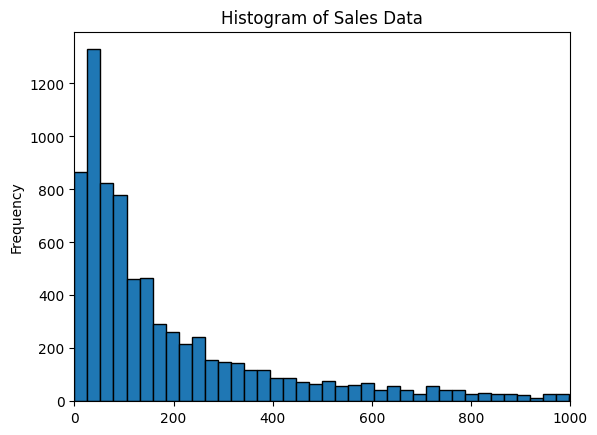

In [251]:
#Q1. Treating the outliers
# Plotting the Sales data
plt.hist(df_filtered['Sales'], bins='auto', edgecolor='black')
plt.title('Histogram of Sales Data')
plt.xlim(0, 1000)
plt.ylabel('Frequency')
plt.show()

In [252]:
# Q2. Discount vs Sales
discount_analysis = df_filtered.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
discount_analysis



Discount      Sales    Profit
0       0.0  1220072.0  309843.0
1       0.1   565205.0   95739.0
2       0.2   224257.0   16479.0
3       0.3     4952.0    -635.0
4       0.4   110980.0  -27598.0
5       0.5   168319.0  -87352.0
6       0.6    19849.0  -14949.0
7       0.7     9116.0  -10757.0
8       0.8      139.0    -426.0
9       0.9      555.0   -1925.0

Text(0.5, 1.0, 'Discount vs Sales')

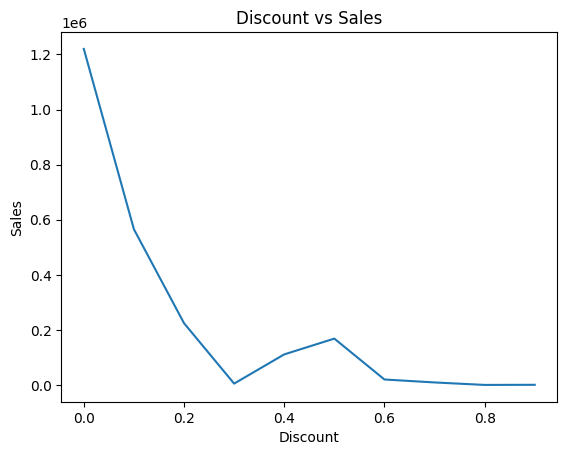

In [253]:
# Q2. Discount vs Sales
plt.plot(discount_analysis['Discount'], discount_analysis['Sales'])
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Discount vs Sales")

# Q2. Discount vs Sales
From the Graph above, we can conclude that, when the discount is at 80%, the sales are at lowest and doesnot motivate the customers to purchase more. This in-turn reduces the profitability.

We can also conclude that, the optimum level of discounts to ensure profitability and maximizing sales is around 0%-10%.

In [254]:
# Q3. Factors that affect the sales the most
from sklearn.linear_model import LinearRegression
import numpy as np

reg_df_filtered1 = df_filtered1[['Discount', 'Quantity', 'Sales']].dropna()
X = reg_df_filtered1[['Discount','Quantity']].values
y = reg_df_filtered1['Sales'].values

model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-42.59772749  73.76017888]
Intercept: 16.309542607328297


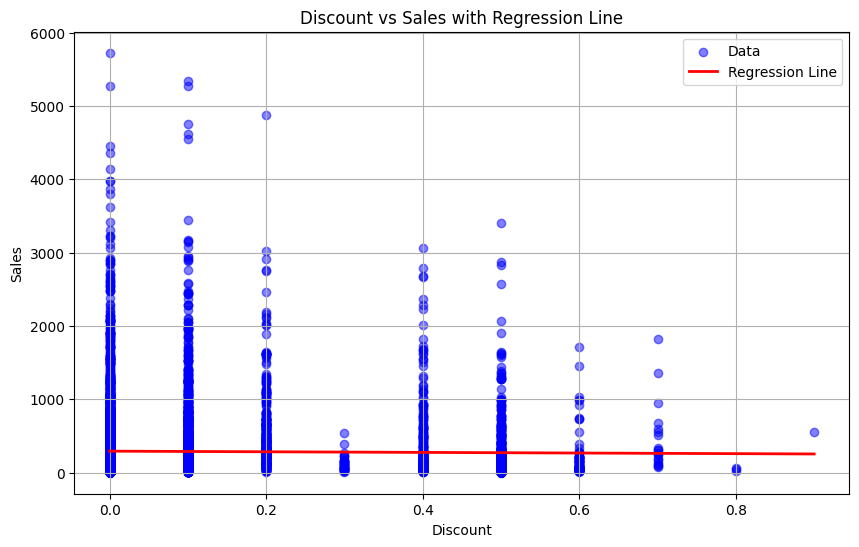

In [311]:
import numpy as np

#For regression line
dscnt_range = np.linspace(reg_df_filtered1['Discount'].min(), reg_df_filtered1['Discount'].max(), 100).reshape(-1, 1)
qnty_mean = reg_df_filtered1['Quantity'].mean()
dscnt_qnty = np.hstack((discount_range, np.full_like(discount_range, quantity_mean)))

sales_predicted = model.predict(dscnt_qnty)

#Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(reg_df_filtered1['Discount'], reg_df_filtered1['Sales'], color='blue', alpha=0.5, label='Data')
plt.plot(discount_range, sales_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Discount vs Sales with Regression Line")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()


Step 2, Q3

What factors affect the sales the most?

From the regression Scatter plot, we can see that the regression line appears flat, which suggests that Discount has very little to no effect on Sales. The Scatter points interpret that the sales have wide range of values for the same discount value, which means that Quantity affects the Sales.

# ***Step 3: Determine origin year of customers***

In [256]:

# Extracting the year from the date.
df_filtered1['Year'] = df_filtered1['Order Date'].dt.year
df_filtered1

Order ID Order Date      Customer Name         Country  \
381    AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
2162  BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
3388   AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
7097  BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
1185  BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
6937  AZ-2014-4986921 2014-08-29       Robert James          France   
3593  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
711   AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
319   AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
1970  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
381   Castile-La Mancha     Toledo    South    Corporate       Economy   
2162          Stockholm      Solna    North     Consumer       Economy   
3388             Vienna     Vienna  Central     Consumer     Immediate   
7097          Stockholm  Stockholm    North    Corporate       Economy   
1185          Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
6937      Ile-de-France    Plaisir  Central  Home Office       Economy   
3593           Scotland  Edinburgh    North  Home Office  Economy Plus   
711             England     London    North     Consumer       Economy   
319              Bremen     Bremen  Central    Corporate  Economy Plus   
1970            England      Luton    North     Consumer     Immediate   

             Category Sub-Category  \
381   Office Supplies        Paper   
2162  Office Supplies       Labels   
3388  Office Supplies      Binders   
7097  Office Supplies       Labels   
1185  Office Supplies      Binders   
...               ...          ...   
6937       Technology       Phones   
3593  Office Supplies   Appliances   
711        Technology       Phones   
319   Office Supplies      Storage   
1970       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
381                 Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
2162  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
3388     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
7097            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
1185          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
6937                Apple Smart Phone, Full Size       0.2  4877.0   746.0   
3593              KitchenAid Refrigerator, Black       0.0  5274.0  1898.0   
711                  Cisco Smart Phone, Cordless       0.1  5277.0  1759.0   
319                  Eldon Lockers, Single Width       0.1  5340.0   232.0   
1970                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   

      Quantity    Year  
381        1.0  2011.0  
2162       1.0  2012.0  
3388       1.0  2013.0  
7097       1.0  2014.0  
1185       1.0  2011.0  
...        ...     ...  
6937       9.0  2014.0  
3593      10.0  2013.0  
711        9.0  2011.0  
319        3.0  2011.0  
1970       9.0  2012.0  

[8039 rows x 17 columns]

In [257]:
#We will now try to identify the year the customer made their first transaction
#One customer can have multiple transactions over different years
df_Initial_Order = df_filtered1.groupby('Customer Name')['Year'].min()
df_Initial_Order

Customer Name
Aaron Bootman       2011.0
Aaron Cunningham    2011.0
Aaron Davey         2011.0
Aaron Macrossan     2011.0
Abbie Perry         2011.0
                     ...  
Zara Loton          2013.0
Zara Money          2011.0
Zoe Lanigan         2011.0
Zoe Lowin           2011.0
Zona Meyer          2012.0
Name: Year, Length: 792, dtype: float64

In [318]:
#Resetting the index to convert the Series into a df_Initial_Order for further processing.
df_Initial_Order = df_Initial_Order.reset_index()
df_Initial_Order

level_0  index     Customer Name    Year
0          0      0     Aaron Bootman  2011.0
1          1      1  Aaron Cunningham  2011.0
2          2      2       Aaron Davey  2011.0
3          3      3   Aaron Macrossan  2011.0
4          4      4       Abbie Perry  2011.0
..       ...    ...               ...     ...
787      787    787        Zara Loton  2013.0
788      788    788        Zara Money  2011.0
789      789    789       Zoe Lanigan  2011.0
790      790    790         Zoe Lowin  2011.0
791      791    791        Zona Meyer  2012.0

[792 rows x 4 columns]

In [319]:
#adding the first transaction year as a new column to the original transaction data.
df_final = pd.merge(df_filtered1, df_Initial_Order, on = 'Customer Name', how = 'left')
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
1     BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
2      AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
3     BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
4     BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8034  AZ-2014-4986921 2014-08-29       Robert James          France   
8035  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
8036  AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
8037  AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
8038  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
0     Castile-La Mancha     Toledo    South    Corporate       Economy   
1             Stockholm      Solna    North     Consumer       Economy   
2                Vienna     Vienna  Central     Consumer     Immediate   
3             Stockholm  Stockholm    North    Corporate       Economy   
4             Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
8034      Ile-de-France    Plaisir  Central  Home Office       Economy   
8035           Scotland  Edinburgh    North  Home Office  Economy Plus   
8036            England     London    North     Consumer       Economy   
8037             Bremen     Bremen  Central    Corporate  Economy Plus   
8038            England      Luton    North     Consumer     Immediate   

             Category Sub-Category  \
0     Office Supplies        Paper   
1     Office Supplies       Labels   
2     Office Supplies      Binders   
3     Office Supplies       Labels   
4     Office Supplies      Binders   
...               ...          ...   
8034       Technology       Phones   
8035  Office Supplies   Appliances   
8036       Technology       Phones   
8037  Office Supplies      Storage   
8038       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
8034                Apple Smart Phone, Full Size       0.2  4877.0   746.0   
8035              KitchenAid Refrigerator, Black       0.0  5274.0  1898.0   
8036                 Cisco Smart Phone, Cordless       0.1  5277.0  1759.0   
8037                 Eldon Lockers, Single Width       0.1  5340.0   232.0   
8038                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   

      Quantity  Year_x  level_0  index  Year_y  
0          1.0  2011.0    571.0  571.0  2011.0  
1          1.0  2012.0    446.0  446.0  2012.0  
2          1.0  2013.0    785.0  785.0  2011.0  
3          1.0  2014.0    423.0  423.0  2011.0  
4          1.0  2011.0    142.0  142.0  2011.0  
...        ...     ...      ...    ...     ...  
8034       9.0  2014.0    661.0  661.0  2011.0  
8035      10.0  2013.0    263.0  263.0  2011.0  
8036       9.0  2011.0    589.0  589.0  2011.0  
8037       3.0  2011.0    193.0  193.0  2011.0  
8038       9.0  2012.0    286.0  286.0  2012.0  

[8039 rows x 20 columns]

In [320]:
# Renaming the Year_y column to OriginYear to  represent the customer's first transaction year in the merged df_final.
df_final.rename(columns = {'Year_y': 'OriginYear'}, inplace = True)
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
1     BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
2      AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
3     BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
4     BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8034  AZ-2014-4986921 2014-08-29       Robert James          France   
8035  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
8036  AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
8037  AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
8038  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
0     Castile-La Mancha     Toledo    South    Corporate       Economy   
1             Stockholm      Solna    North     Consumer       Economy   
2                Vienna     Vienna  Central     Consumer     Immediate   
3             Stockholm  Stockholm    North    Corporate       Economy   
4             Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
8034      Ile-de-France    Plaisir  Central  Home Office       Economy   
8035           Scotland  Edinburgh    North  Home Office  Economy Plus   
8036            England     London    North     Consumer       Economy   
8037             Bremen     Bremen  Central    Corporate  Economy Plus   
8038            England      Luton    North     Consumer     Immediate   

             Category Sub-Category  \
0     Office Supplies        Paper   
1     Office Supplies       Labels   
2     Office Supplies      Binders   
3     Office Supplies       Labels   
4     Office Supplies      Binders   
...               ...          ...   
8034       Technology       Phones   
8035  Office Supplies   Appliances   
8036       Technology       Phones   
8037  Office Supplies      Storage   
8038       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
8034                Apple Smart Phone, Full Size       0.2  4877.0   746.0   
8035              KitchenAid Refrigerator, Black       0.0  5274.0  1898.0   
8036                 Cisco Smart Phone, Cordless       0.1  5277.0  1759.0   
8037                 Eldon Lockers, Single Width       0.1  5340.0   232.0   
8038                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   

      Quantity  Year_x  level_0  index  OriginYear  
0          1.0  2011.0    571.0  571.0      2011.0  
1          1.0  2012.0    446.0  446.0      2012.0  
2          1.0  2013.0    785.0  785.0      2011.0  
3          1.0  2014.0    423.0  423.0      2011.0  
4          1.0  2011.0    142.0  142.0      2011.0  
...        ...     ...      ...    ...         ...  
8034       9.0  2014.0    661.0  661.0      2011.0  
8035      10.0  2013.0    263.0  263.0      2011.0  
8036       9.0  2011.0    589.0  589.0      2011.0  
8037       3.0  2011.0    193.0  193.0      2011.0  
8038       9.0  2012.0    286.0  286.0      2012.0  

[8039 rows x 20 columns]

# ***Step 4: Calculate cumulative transaction amounts***

In [321]:
# Calculating Customer Tenure - Number of years has the user been a customer
# df_final['CustomerTenure'] = (pd.to_datetime(df_final['TransactionDate']) - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31
df_final['CustomerTenure'] = (df_final['Order Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
1     BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
2      AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
3     BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
4     BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8034  AZ-2014-4986921 2014-08-29       Robert James          France   
8035  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
8036  AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
8037  AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
8038  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
0     Castile-La Mancha     Toledo    South    Corporate       Economy   
1             Stockholm      Solna    North     Consumer       Economy   
2                Vienna     Vienna  Central     Consumer     Immediate   
3             Stockholm  Stockholm    North    Corporate       Economy   
4             Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
8034      Ile-de-France    Plaisir  Central  Home Office       Economy   
8035           Scotland  Edinburgh    North  Home Office  Economy Plus   
8036            England     London    North     Consumer       Economy   
8037             Bremen     Bremen  Central    Corporate  Economy Plus   
8038            England      Luton    North     Consumer     Immediate   

             Category  ...                                Product Name  \
0     Office Supplies  ...                Xerox Memo Slips, Multicolor   
1     Office Supplies  ...  Hon Round Labels, Laser Printer Compatible   
2     Office Supplies  ...     Wilson Jones Hole Reinforcements, Clear   
3     Office Supplies  ...            Hon Removable Labels, Adjustable   
4     Office Supplies  ...          Ibico Hole Reinforcements, Durable   
...               ...  ...                                         ...   
8034       Technology  ...                Apple Smart Phone, Full Size   
8035  Office Supplies  ...              KitchenAid Refrigerator, Black   
8036       Technology  ...                 Cisco Smart Phone, Cordless   
8037  Office Supplies  ...                 Eldon Lockers, Single Width   
8038       Technology  ...                Nokia Smart Phone, Full Size   

     Discount   Sales  Profit  Quantity  Year_x  level_0  index  OriginYear  \
0         0.0     0.0     0.0       1.0  2011.0    571.0  571.0      2011.0   
1         0.5     3.0    -1.0       1.0  2012.0    446.0  446.0      2012.0   
2         0.0     4.0     0.0       1.0  2013.0    785.0  785.0      2011.0   
3         0.5     4.0    -3.0       1.0  2014.0    423.0  423.0      2011.0   
4         0.5     4.0    -2.0       1.0  2011.0    142.0  142.0      2011.0   
...       ...     ...     ...       ...     ...      ...    ...         ...   
8034      0.2  4877.0   746.0       9.0  2014.0    661.0  661.0      2011.0   
8035      0.0  5274.0  1898.0      10.0  2013.0    263.0  263.0      2011.0   
8036      0.1  5277.0  1759.0       9.0  2011.0    589.0  589.0      2011.0   
8037      0.1  5340.0   232.0       3.0  2011.0    193.0  193.0      2011.0   
8038      0.0  5725.0  2461.0       9.0  2012.0    286.0  286.0      2012.0   

      CustomerTenure  
0           4.451613  
1           5.806452  
2          24.000000  
3          43.645161  
4          10.290323  
...              ...  
8034       43.096774  
8035       25.419355  
8036        7.129032  
8037        3.935484  
8038        4.806452  

[8039 rows x 21 columns]

In [322]:
#Assigning the tenure range
def TenureRangeFunc(d):
    if (d['CustomerTenure'] <= 12):
        return 12
    elif (d['CustomerTenure'] > 12 and d['CustomerTenure']<= 24):
        return 24
    elif (d['CustomerTenure'] > 24 and d['CustomerTenure']<= 36):
        return 36
    elif (d['CustomerTenure'] > 36 and d['CustomerTenure']<= 48):
        return 48
    elif (d['CustomerTenure'] > 48 and d['CustomerTenure']<= 60):
        return 60
    else:
        return 72

df_final['CustomerTenureRange'] = df_final.apply(TenureRangeFunc, axis = 1)
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
1     BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
2      AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
3     BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
4     BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8034  AZ-2014-4986921 2014-08-29       Robert James          France   
8035  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
8036  AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
8037  AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
8038  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
0     Castile-La Mancha     Toledo    South    Corporate       Economy   
1             Stockholm      Solna    North     Consumer       Economy   
2                Vienna     Vienna  Central     Consumer     Immediate   
3             Stockholm  Stockholm    North    Corporate       Economy   
4             Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
8034      Ile-de-France    Plaisir  Central  Home Office       Economy   
8035           Scotland  Edinburgh    North  Home Office  Economy Plus   
8036            England     London    North     Consumer       Economy   
8037             Bremen     Bremen  Central    Corporate  Economy Plus   
8038            England      Luton    North     Consumer     Immediate   

             Category  ... Discount   Sales  Profit  Quantity  Year_x  \
0     Office Supplies  ...      0.0     0.0     0.0       1.0  2011.0   
1     Office Supplies  ...      0.5     3.0    -1.0       1.0  2012.0   
2     Office Supplies  ...      0.0     4.0     0.0       1.0  2013.0   
3     Office Supplies  ...      0.5     4.0    -3.0       1.0  2014.0   
4     Office Supplies  ...      0.5     4.0    -2.0       1.0  2011.0   
...               ...  ...      ...     ...     ...       ...     ...   
8034       Technology  ...      0.2  4877.0   746.0       9.0  2014.0   
8035  Office Supplies  ...      0.0  5274.0  1898.0      10.0  2013.0   
8036       Technology  ...      0.1  5277.0  1759.0       9.0  2011.0   
8037  Office Supplies  ...      0.1  5340.0   232.0       3.0  2011.0   
8038       Technology  ...      0.0  5725.0  2461.0       9.0  2012.0   

      level_0  index  OriginYear  CustomerTenure  CustomerTenureRange  
0       571.0  571.0      2011.0        4.451613                   12  
1       446.0  446.0      2012.0        5.806452                   12  
2       785.0  785.0      2011.0       24.000000                   24  
3       423.0  423.0      2011.0       43.645161                   48  
4       142.0  142.0      2011.0       10.290323                   12  
...       ...    ...         ...             ...                  ...  
8034    661.0  661.0      2011.0       43.096774                   48  
8035    263.0  263.0      2011.0       25.419355                   36  
8036    589.0  589.0      2011.0        7.129032                   12  
8037    193.0  193.0      2011.0        3.935484                   12  
8038    286.0  286.0      2012.0        4.806452                   12  

[8039 rows x 22 columns]

In [323]:
# Representing in a tabular format
trans_amount = df_final.pivot_table(values='Sales', index='OriginYear', columns='CustomerTenureRange', aggfunc = 'sum')
trans_amount

CustomerTenureRange        12        24        36        48     72
OriginYear                                                        
2011.0               413159.0  347416.0  381308.0  452723.0  230.0
2012.0               211370.0  171420.0  189469.0       NaN    NaN
2013.0                84057.0   64862.0       NaN       NaN  301.0
2014.0                12108.0       NaN       NaN       NaN    NaN

In [325]:
# Computing the cumulative sum across columns to track cumulative transaction amounts over time.
trans_amount = trans_amount.cumsum(axis = 1)
print(trans_amount)

CustomerTenureRange        12         24         36         48         72
OriginYear                                                               
2011.0               413159.0  1173734.0  2315617.0  3910223.0  5505059.0
2012.0               211370.0   594160.0  1166419.0        NaN        NaN
2013.0                84057.0   232976.0        NaN        NaN   382196.0
2014.0                12108.0        NaN        NaN        NaN        NaN


In [265]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="CustomerTenure", value_name="Value")
unpivot_trans

OriginYear CustomerTenure      Value
0       2011.0             12   413159.0
1       2012.0             12   211370.0
2       2013.0             12    84057.0
3       2014.0             12    12108.0
4       2011.0             24   760575.0
5       2012.0             24   382790.0
6       2013.0             24   148919.0
7       2014.0             24        NaN
8       2011.0             36  1141883.0
9       2012.0             36   572259.0
10      2013.0             36        NaN
11      2014.0             36        NaN
12      2011.0             48  1594606.0
13      2012.0             48        NaN
14      2013.0             48        NaN
15      2014.0             48        NaN
16      2011.0             72  1594836.0
17      2012.0             72        NaN
18      2013.0             72   149220.0
19      2014.0             72        NaN

# ***Step 5: Calculate the number of new customers***

In [266]:
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
1     BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
2      AZ-2013-273412 2013-01-14     Zachary Warner         Austria   
3     BN-2014-5531507 2014-09-15       Kayla Tearle          Sweden   
4     BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8034  AZ-2014-4986921 2014-08-29       Robert James          France   
8035  AZ-2013-9761394 2013-02-27      George Dawson  United Kingdom   
8036  AZ-2011-5059692 2011-08-10      Natasha Sykes  United Kingdom   
8037  AZ-2011-3348631 2011-05-03      Ebony Sadlier         Germany   
8038  AZ-2012-5752966 2012-05-29     Harrison Cooke  United Kingdom   

                  State       City   Region      Segment     Ship Mode  \
0     Castile-La Mancha     Toledo    South    Corporate       Economy   
1             Stockholm      Solna    North     Consumer       Economy   
2                Vienna     Vienna  Central     Consumer     Immediate   
3             Stockholm  Stockholm    North    Corporate       Economy   
4             Stockholm  Stockholm    North    Corporate       Economy   
...                 ...        ...      ...          ...           ...   
8034      Ile-de-France    Plaisir  Central  Home Office       Economy   
8035           Scotland  Edinburgh    North  Home Office  Economy Plus   
8036            England     London    North     Consumer       Economy   
8037             Bremen     Bremen  Central    Corporate  Economy Plus   
8038            England      Luton    North     Consumer     Immediate   

             Category Sub-Category  \
0     Office Supplies        Paper   
1     Office Supplies       Labels   
2     Office Supplies      Binders   
3     Office Supplies       Labels   
4     Office Supplies      Binders   
...               ...          ...   
8034       Technology       Phones   
8035  Office Supplies   Appliances   
8036       Technology       Phones   
8037  Office Supplies      Storage   
8038       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
8034                Apple Smart Phone, Full Size       0.2  4877.0   746.0   
8035              KitchenAid Refrigerator, Black       0.0  5274.0  1898.0   
8036                 Cisco Smart Phone, Cordless       0.1  5277.0  1759.0   
8037                 Eldon Lockers, Single Width       0.1  5340.0   232.0   
8038                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   

      Quantity  Year_x  OriginYear  CustomerTenure  CustomerTenureRange  
0          1.0  2011.0      2011.0        4.451613                   12  
1          1.0  2012.0      2012.0        5.806452                   12  
2          1.0  2013.0      2011.0       24.000000                   24  
3          1.0  2014.0      2011.0       43.645161                   48  
4          1.0  2011.0      2011.0       10.290323                   12  
...        ...     ...         ...             ...                  ...  
8034       9.0  2014.0      2011.0       43.096774                   48  
8035      10.0  2013.0      2011.0       25.419355                   36  
8036       9.0  2011.0      2011.0        7.129032                   12  
8037       3.0  2011.0      2011.0        3.935484                   12  
8038       9.0  2012.0      2012.0        4.806452             

In [268]:
# Now we find new customers, where origin year matches the transaction year
df_CustomerName = df_final[df_final['OriginYear'] == df_final['Year_x']]

# A customer may also have multiple purchases within its origin year
df_CustomerName.sort_values(by='Customer Name')

Order ID Order Date  Customer Name         Country  \
1934  AZ-2011-2169445 2011-03-21  Aaron Bootman           Italy   
2134  AZ-2011-9409671 2011-04-04  Aaron Bootman  United Kingdom   
1238  AZ-2011-9409671 2011-04-04  Aaron Bootman  United Kingdom   
3138  AZ-2011-2169445 2011-03-21  Aaron Bootman           Italy   
2954  AZ-2011-3937280 2011-08-30  Aaron Bootman           Italy   
...               ...        ...            ...             ...   
2266  AZ-2012-3229399 2012-06-02     Zona Meyer         Germany   
2075  AZ-2012-5862496 2012-07-24     Zona Meyer          France   
4840  AZ-2012-5862496 2012-07-24     Zona Meyer          France   
1986  AZ-2012-5862496 2012-07-24     Zona Meyer          France   
4231  AZ-2012-5862496 2012-07-24     Zona Meyer          France   

                           State       City   Region    Segment     Ship Mode  \
1934                      Sicily    Marsala    South   Consumer      Priority   
2134                    Scotland  Edinburgh    North   Consumer       Economy   
1238                    Scotland  Edinburgh    North   Consumer       Economy   
3138                      Sicily    Marsala    South   Consumer      Priority   
2954                      Veneto    Vicenza    South   Consumer  Economy Plus   
...                          ...        ...      ...        ...           ...   
2266                Lower Saxony  Oldenburg  Central  Corporate       Economy   
2075  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
4840  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
1986  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
4231  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   

             Category Sub-Category  \
1934  Office Supplies       Labels   
2134  Office Supplies          Art   
1238  Office Supplies       Labels   
3138       Technology       Phones   
2954        Furniture  Furnishings   
...               ...          ...   
2266  Office Supplies    Fasteners   
2075  Office Supplies        Paper   
4840  Office Supplies      Storage   
1986  Office Supplies      Storage   
4231  Office Supplies      Storage   

                                           Product Name  Discount  Sales  \
1934  Harbour Creations Round Labels, Laser Printer ...       0.0   47.0   
2134                Binney & Smith Markers, Fluorescent       0.0   51.0   
1238              Novimex Shipping Labels, Alphabetical       0.0   32.0   
3138                   Apple Office Telephone, Cordless       0.4   82.0   
2954                         Tenex Light Bulb, Duo Pack       0.0   76.0   
...                                                 ...       ...    ...   
2266                        Advantus Paper Clips, Metal       0.0   54.0   
2075                Green Bar Parchment Paper, Recycled       0.0   50.0   
4840                                 Rogers Trays, Blue       0.1  167.0   
1986                             Fellowes Folders, Blue       0.1   48.0   
4231                         Smead Shelving, Wire Frame       0.1  130.0   

      Profit  Quantity  Year_x  OriginYear  CustomerTenure  \
1934     7.0       7.0  2011.0      2011.0        2.548387   
2134    14.0       2.0  2011.0      2011.0        3.000000   
1238    16.0       3.0  2011.0      2011.0        3.000000   
3138    14.0       2.0  2011.0      2011.0        2.548387   
2954     9.0       4.0  2011.0      2011.0        7.774194   
...      ...       ...     ...         ...             ...   
2266    13.0       4.0  2012.0      2012.0        4.935484   
2075    23.0       3.0  2012.0      2012.0        6.612903   
4840    37.0       3.0  2012.0      2012.0        6.612903   
1986    21.0       2.0  2012.0      2012.0        6.612903   
4231    52.0       3.0  2012.0      2012.0        6.612903   

      CustomerTenureRange  
1934                   12  
2134                   12  
1238                   12  
3138    

In [269]:
#True represents number of duplicate values, False represents unique values in the Order ID.
df_CustomerName.duplicated(subset = ['Customer Name']).value_counts()

True     1676
False     792
Name: count, dtype: int64

In [270]:
df_CustomerName_noDuplicate = df_CustomerName.drop_duplicates(subset = ['Customer Name'])
df_CustomerName_noDuplicate

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750 2011-05-19  Milla Hollinworth           Spain   
1     BN-2012-8400051 2012-06-29    Kristen Holland          Sweden   
4     BN-2011-5491702 2011-11-16      Claudia Poore          Sweden   
6     AZ-2012-7448408 2012-07-14       Jacob Varley  United Kingdom   
7     BN-2011-1778575 2011-10-08       Daniel Burke          Sweden   
...               ...        ...                ...             ...   
7914  BN-2011-7580951 2011-11-26        Charli Rose         Germany   
7917  AZ-2011-4087409 2011-06-11          Anna Leal         Austria   
7945  BN-2011-6162681 2011-05-30        Angus Ibsch          France   
7986  AZ-2012-6569540 2012-05-16    Janet Broussard           Spain   
8005   AZ-2012-909274 2012-07-23        Morgan Dodd         Germany   

                                    State       City   Region      Segment  \
0                       Castile-La Mancha     Toledo    South    Corporate   
1                               Stockholm      Solna    North     Consumer   
4                               Stockholm  Stockholm    North    Corporate   
6                                 England  Sheffield    North    Corporate   
7                               Stockholm  Stockholm    North  Home Office   
...                                   ...        ...      ...          ...   
7914               North Rhine-Westphalia     Menden  Central     Consumer   
7917                               Vienna     Vienna  Central     Consumer   
7945  Aquitaine-Limousin-Poitou-Charentes    Talence  Central     Consumer   
7986                               Madrid      Parla    South     Consumer   
8005                               Berlin     Berlin  Central     Consumer   

         Ship Mode         Category Sub-Category  \
0          Economy  Office Supplies        Paper   
1          Economy  Office Supplies       Labels   
4          Economy  Office Supplies      Binders   
6          Economy  Office Supplies    Envelopes   
7     Economy Plus  Office Supplies      Binders   
...            ...              ...          ...   
7914       Economy  Office Supplies   Appliances   
7917      Priority        Furniture    Bookcases   
7945      Priority        Furniture       Tables   
7986       Economy        Furniture    Bookcases   
8005       Economy       Technology       Phones   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
6                Kraft Clasp Envelope, Set of 50       0.5     5.0    -5.0   
7            Cardinal Hole Reinforcements, Clear       0.5     5.0     0.0   
...                                          ...       ...     ...     ...   
7914                         Hoover Stove, White       0.1  2040.0  -113.0   
7917                Ikea Classic Bookcase, Metal       0.0  2056.0   391.0   
7945       Hon Computer Table, Adjustable Height       0.4  2229.0  -754.0   
7986      Sauder Library with Doors, Traditional       0.0  2713.0    27.0   
8005           Cisco Smart Phone, with Caller ID       0.1  2944.0  1112.0   

      Quantity  Year_x  OriginYear  CustomerTenure  CustomerTenureRange  
0          1.0  2011.0      2011.0        4.451613                   12  
1          1.0  2012.0      2012.0        5.806452                   12  
4          1.0  2011.0      2011.0       10.290323                   12  
6          1.0  2012.0      2012.0        6.290323                   12  
7          2.0  2011.0      2011.0        9.032258                   12  
...        ...     ...         ...             ...                  ...  
7914       4.0  2011.0      2011.0       10.612903                   12  
7917       5.0  2011.0      2011.0        5.193548                   

In [271]:
new_customers_by_year = df_CustomerName_noDuplicate.groupby('OriginYear')['Customer Name'].nunique()
new_customers_by_year

OriginYear
2011.0    492
2012.0    204
2013.0     79
2014.0     17
Name: Customer Name, dtype: int64

# ***Step 6: Historic CLV***

In [274]:
#To unpivot_trans
df_final_trans = unpivot_trans.merge(new_customers_by_year, on = 'OriginYear', how = 'left')
df_final_trans


OriginYear CustomerTenure      Value  Customer Name
0       2011.0             12   413159.0            492
1       2012.0             12   211370.0            204
2       2013.0             12    84057.0             79
3       2014.0             12    12108.0             17
4       2011.0             24   760575.0            492
5       2012.0             24   382790.0            204
6       2013.0             24   148919.0             79
7       2014.0             24        NaN             17
8       2011.0             36  1141883.0            492
9       2012.0             36   572259.0            204
10      2013.0             36        NaN             79
11      2014.0             36        NaN             17
12      2011.0             48  1594606.0            492
13      2012.0             48        NaN            204
14      2013.0             48        NaN             79
15      2014.0             48        NaN             17
16      2011.0             72  1594836.0            492
17      2012.0             72        NaN            204
18      2013.0             72   149220.0             79
19      2014.0             72        NaN             17

In [275]:
#Unpivot by default takes Column name as Customer ID, we need to change it NewCustCount below

df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['Customer Name']
df_final_trans


OriginYear CustomerTenure      Value  Customer Name          CLV
0       2011.0             12   413159.0            492   839.754065
1       2012.0             12   211370.0            204  1036.127451
2       2013.0             12    84057.0             79  1064.012658
3       2014.0             12    12108.0             17   712.235294
4       2011.0             24   760575.0            492  1545.884146
5       2012.0             24   382790.0            204  1876.421569
6       2013.0             24   148919.0             79  1885.050633
7       2014.0             24        NaN             17          NaN
8       2011.0             36  1141883.0            492  2320.900407
9       2012.0             36   572259.0            204  2805.191176
10      2013.0             36        NaN             79          NaN
11      2014.0             36        NaN             17          NaN
12      2011.0             48  1594606.0            492  3241.069106
13      2012.0             48        NaN            204          NaN
14      2013.0             48        NaN             79          NaN
15      2014.0             48        NaN             17          NaN
16      2011.0             72  1594836.0            492  3241.536585
17      2012.0             72        NaN            204          NaN
18      2013.0             72   149220.0             79  1888.860759
19      2014.0             72        NaN             17          NaN

In [276]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='CustomerTenure', aggfunc = 'sum')
CLV_table


CustomerTenure           12           24           36           48  \
OriginYear                                                           
2011.0           839.754065  1545.884146  2320.900407  3241.069106   
2012.0          1036.127451  1876.421569  2805.191176     0.000000   
2013.0          1064.012658  1885.050633     0.000000     0.000000   
2014.0           712.235294     0.000000     0.000000     0.000000   

CustomerTenure           72  
OriginYear                   
2011.0          3241.536585  
2012.0             0.000000  
2013.0          1888.860759  
2014.0             0.000000

CustomerTenure
12     913.032367
24    1769.118783
36    2563.045791
48    3241.069106
72    2565.198672
Name: CLV, dtype: float64

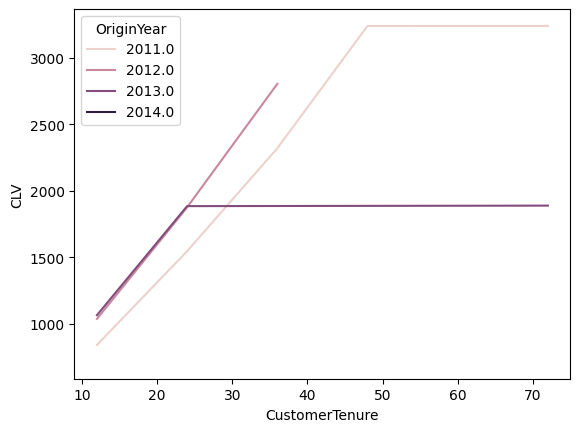

In [277]:
sns.lineplot(x = df_final_trans['CustomerTenure'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])
df_final_trans.groupby('CustomerTenure')['CLV'].mean()

# ***Step 7 : Interpreting your results***

Interpretation of CLV Values by Tenure:

12 Months: $913.03

24 Months: $1,769.12

36 Months: $2,568.86

48 Months: $3,264.35

72 Months: $2,576.83

2011 : The highest CLV, growing steadily for 48 months before declining.

2012 : Lower than 2011, moderate increase, plateauing at 36 months.

2013 and 2014: Flat and noticeably reduced CLV, indicating minimal engagement or retention.

Overall Trend: Lower retention and acquisition quality is indicated by declining CLV in younger cohorts with earlier plateaus.
